In [7]:
# NOTEBOOK
import kagglehub
dmitrybabko_speech_emotion_recognition_en_path = kagglehub.dataset_download('dmitrybabko/speech-emotion-recognition-en')
phucduck_toronto_emotional_speech_path = kagglehub.dataset_download('phucduck/toronto-emotional-speech')

print('Data source import complete.')


Using Colab cache for faster access to the 'speech-emotion-recognition-en' dataset.
Using Colab cache for faster access to the 'toronto-emotional-speech' dataset.
Data source import complete.


Speech processing system mainly has 3 tasks -


1) First, speech recognition that allows the machine to catch the words, phrases and sentences we speak.

2) Second, natural language processing to allow the machine to understand what we speak, and

3) Third, speech synthesis to allow the machine to speak.

# How does speech recognition work?

# Difficulties in developing a speech recognizer

* Size of the vocabulary - Larger the size of vocabulary, the harder it is to perform speech recognition.

* Channel Charateristics - Channel quality is also an important dimension. For example, human speech contains high bandwidth with full frequency range, while a telephone speech consists of low bandwidth with limited frequency range. It is harder in the latter.

* Speaking mode - Ease of developing an ASR also depends on the speaking mode, that is whether the speech is in isolated word mode, or connected word mode, or in a continuous speech mode. Note that a continuous speech is harder to recognize.

* Speaking style - A read speech may be in a formal style, or spontaneous and conversational with casual style. The latter is harder to recognize.

* Speaker dependency - Speech can be speaker dependent, speaker adaptive, or speaker independent. A speaker independent is the hardest to build.

* Type of noise -  Noise is another factor to consider while developing an ASR. Signal to noise ratio may be in various ranges, depending on the acoustic environment that observes less versus more background noise. If the signal to noise ratio is greater than 30dB, it is considered as high range.

* Microphone characteristics - he quality of microphone may be good, average, or below average. Also, the distance between mouth and micro-phone can vary.



# Visualizing audio files

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [9]:
import os
frequency_sampling, audio_signal = wavfile.read(os.path.join(dmitrybabko_speech_emotion_recognition_en_path, "Ravdess/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav"))

/tmp/ipython-input-2198124531.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  frequency_sampling, audio_signal = wavfile.read(os.path.join(dmitrybabko_speech_emotion_recognition_en_path, "Ravdess/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav"))


In [10]:
print('\nSignal shape:', audio_signal.shape)
print('Signal Datatype:', audio_signal.dtype)
print('Signal duration:', round(audio_signal.shape[0] /
float(frequency_sampling), 2), 'seconds')


Signal shape: (158558,)
Signal Datatype: int16
Signal duration: 3.3 seconds


In [11]:
audio_signal = audio_signal / np.power(2, 15)

In [12]:
audio_signal = audio_signal [:100]
time_axis = 1000 * np.arange(0, len(audio_signal), 1) / float(frequency_sampling)

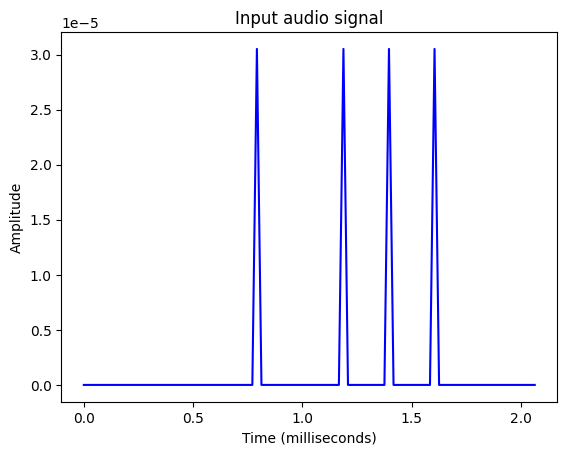

In [13]:
plt.plot(time_axis, audio_signal, color='blue')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

# Characterizing the audio signal
Converting the time domain signal into frequency domain. This is important because it gives a lot of information about the signal. A mathematical tool like fourier transformation can be used for this.

In [15]:
length_signal = len(audio_signal)
half_length = np.ceil((length_signal + 1) / 2.0).astype(int)

In [16]:
signal_frequency = np.fft.fft(audio_signal)

In [17]:
signal_frequency = abs(signal_frequency[0:half_length]) / length_signal
signal_frequency **= 2

In [18]:
len_fts = len(signal_frequency)

In [19]:
if length_signal % 2:
   signal_frequency[1:len_fts] *= 2
else:
   signal_frequency[1:len_fts-1] *= 2

In [20]:
signal_power = 10 * np.log10(signal_frequency)

In [21]:
x_axis = np.arange(0, half_length, 1) * (frequency_sampling / length_signal) / 1000.0

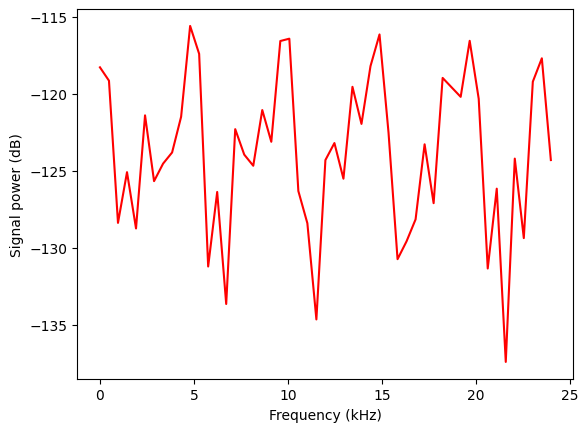

In [22]:
plt.figure()
plt.plot(x_axis, signal_power, color='red')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()

# Installing libraries

In [23]:
!pip install SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 64.1 MB/s eta 0:00:00


In [24]:
import speech_recognition as sr
sr.__version__

'3.14.3'

# Recognizer class

In [25]:
r = sr.Recognizer()

# Loading an audio file

In [28]:
ad1 = sr.AudioFile(os.path.join(dmitrybabko_speech_emotion_recognition_en_path, 'Savee', 'DC_a03.wav'))

In [29]:
with ad1 as source:
    audio = r.record(source)

In [30]:
type(audio)

speech_recognition.audio.AudioData

In [31]:
#using google web speech API
r.recognize_google(audio)

'will you tell me why'

In [32]:
ad2 = sr.AudioFile('/kaggle/input/toronto-emotional-speech/TESS Toronto emotional speech set data/YAF_angry/YAF_back_angry.wav')

In [33]:
with ad2 as source:
    audio2 = r.record(source)

In [34]:
type(audio2)

speech_recognition.audio.AudioData

In [35]:
r.recognize_google(audio2,language = "en-EN")

'say the word back'